In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
df1 = pd.read_csv("C:/Users/Zach/Documents/GitHub/TelecomsPredict/Data/telco_customer_churn.csv")

#BasicEDA
def check_statistical_parameters(df1):
    summary = df1.describe().T
    return summary
check_statistical_parameters(df1)


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [3]:
for col in df1.columns[1:]:  # Skip the first column
    unique_values = df1[col].unique()
    print(f"Column: {col}")
    print(f"Type :{df1[col].dtypes}")
    print(f"Unique values: {unique_values}\n")
    
df1[df1["TotalCharges"].str.contains("^\s*$", na=False)]


Column: gender
Type :object
Unique values: ['Female' 'Male']

Column: SeniorCitizen
Type :int64
Unique values: [0 1]

Column: Partner
Type :object
Unique values: ['Yes' 'No']

Column: Dependents
Type :object
Unique values: ['No' 'Yes']

Column: tenure
Type :int64
Unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column: PhoneService
Type :object
Unique values: ['No' 'Yes']

Column: MultipleLines
Type :object
Unique values: ['No phone service' 'No' 'Yes']

Column: InternetService
Type :object
Unique values: ['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
Type :object
Unique values: ['No' 'Yes' 'No internet service']

Column: OnlineBackup
Type :object
Unique values: ['Yes' 'No' 'No internet service']

Column: DeviceProtection
Type :object
Unique values: ['No' 'Yes' 'No internet service']

Column: T

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Zach\AppData\Local\Temp\ipykernel_14972\242064683.py:7: SyntaxWarning: invalid escape sequence '\s'
  df1[df1["TotalCharges"].str.contains("^\s*$", na=False)]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [4]:
from sklearn.preprocessing import OneHotEncoder


cols_to_encode = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV',
                  'StreamingMovies','Contract','PaperlessBilling','PaymentMethod', 'Churn']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df1[cols_to_encode])
Encoded_DF = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cols_to_encode), index=df1.index)
df1 = df1.drop(columns=cols_to_encode)
df2 = pd.concat([df1, Encoded_DF], axis=1)
print(df2.head())


   customerID  tenure  MonthlyCharges TotalCharges  gender_Female  \
0  7590-VHVEG       1           29.85        29.85            1.0   
1  5575-GNVDE      34           56.95       1889.5            0.0   
2  3668-QPYBK       2           53.85       108.15            0.0   
3  7795-CFOCW      45           42.30      1840.75            0.0   
4  9237-HQITU       2           70.70       151.65            1.0   

   gender_Male  SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  \
0          0.0              1.0              0.0         0.0          1.0   
1          1.0              1.0              0.0         1.0          0.0   
2          1.0              1.0              0.0         1.0          0.0   
3          1.0              1.0              0.0         1.0          0.0   
4          0.0              1.0              0.0         1.0          0.0   

   ...  Contract_One year  Contract_Two year  PaperlessBilling_No  \
0  ...                0.0                0.0         

In [ ]:
#saving file

In [5]:
# Check for missing values
missing_values = df2.isnull().sum()
missing_values

customerID                                 0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecu

In [6]:
#casting tenure as float
df2['tenure'] = df2['tenure'].astype(float)
df2['MonthlyCharges'] = df2['MonthlyCharges'].astype(float)
df2["TotalCharges"] = df2["TotalCharges"].replace(r"^\s*$", "0", regex=True) #adrress empty strings
df2["TotalCharges"] = df2["TotalCharges"].astype(float)  # Convert to float
# Check the data types again
print(df2.dtypes)

customerID                                  object
tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                              float64
gender_Male                                float64
SeniorCitizen_0                            float64
SeniorCitizen_1                            float64
Partner_No                                 float64
Partner_Yes                                float64
Dependents_No                              float64
Dependents_Yes                             float64
PhoneService_No                            float64
PhoneService_Yes                           float64
MultipleLines_No                           float64
MultipleLines_No phone service             float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No             

In [7]:
#New basic features
df2['AvgCustomerRevenuePerMonth'] = df2['TotalCharges'] / df2['tenure']
df2["TotalCustomerValue"] = df2["MonthlyCharges"] * df2["tenure"]

#summing the service binary features
service_cols_yes = ['PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL','InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']
df2['Total_Yes_Services'] = df2[service_cols_yes].sum(axis=1)

# Check the new feature
print(df2[['Total_Yes_Services']].head(30))





    Total_Yes_Services
0                  2.0
1                  4.0
2                  4.0
3                  4.0
4                  2.0
5                  6.0
6                  5.0
7                  2.0
8                  7.0
9                  4.0
10                 3.0
11                 1.0
12                 6.0
13                 7.0
14                 7.0
15                 9.0
16                 1.0
17                 7.0
18                 4.0
19                 5.0
20                 3.0
21                 1.0
22                 1.0
23                 5.0
24                 5.0
25                 4.0
26                 6.0
27                 2.0
28                 9.0
29                 4.0


Cross-tabulation of Contract MtoM and PaymentMethod Automatic Bank Transfer vs. Churn:
Churn_Yes                                                             0.0  \
Contract_Month-to-month PaymentMethod_Bank transfer (automatic)             
0.0                     0.0                                      0.929056   
                        1.0                                      0.940314   
1.0                     0.0                                      0.557517   
                        1.0                                      0.658744   

Churn_Yes                                                             1.0  
Contract_Month-to-month PaymentMethod_Bank transfer (automatic)            
0.0                     0.0                                      0.070944  
                        1.0                                      0.059686  
1.0                     0.0                                      0.442483  
                        1.0                                      0.341

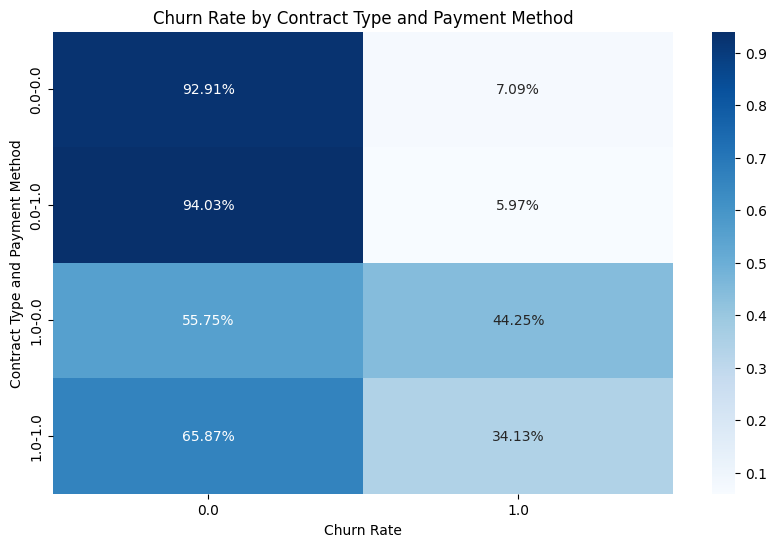

In [8]:
crosstab = pd.crosstab([df2['Contract_Month-to-month'], df2['PaymentMethod_Bank transfer (automatic)']], df2['Churn_Yes'], normalize='index')
print("Cross-tabulation of Contract MtoM and PaymentMethod Automatic Bank Transfer vs. Churn:")
print(crosstab)
#visualizing the crosstab -- could do more of these just a sample to discuss if useful
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='.2%', cmap='Blues')
plt.title('Churn Rate by Contract Type and Payment Method')
plt.xlabel('Churn Rate')
plt.ylabel('Contract Type and Payment Method')
plt.show()

#what the plot shows is that the churn rate is higher for month-to-month contracts and bank transfer payment method. 
# This suggests that customers on month-to-month contracts who pay via bank transfer are more likely to churn compared to those on other payment methods. 
# This could be due to the flexibility of month-to-month contracts, which may lead to less commitment from customers.


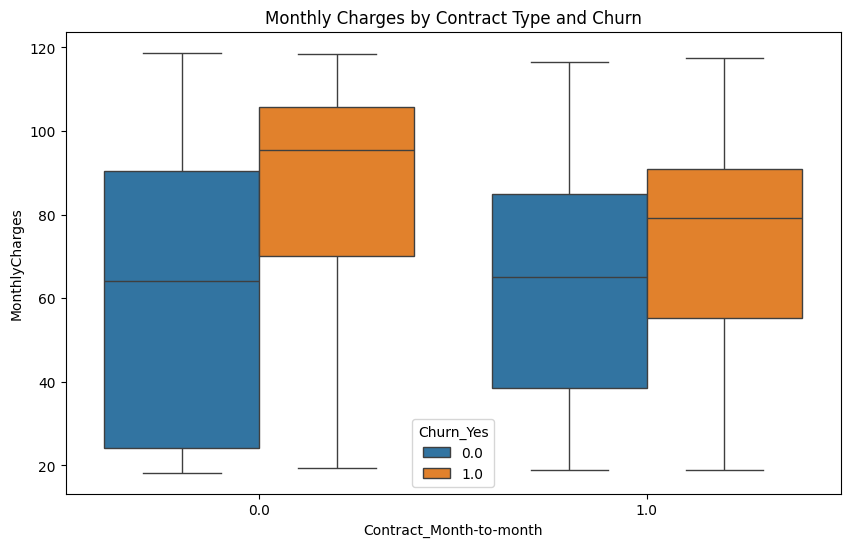

In [9]:
#COuld do many more of these for EDA but just to see if this is useful for us --- can discuss later
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract_Month-to-month', y='MonthlyCharges', hue='Churn_Yes', data=df2)
plt.title("Monthly Charges by Contract Type and Churn")
plt.show()

=== Basic Dataset Overview ===
Dataset Shape: (7043, 52)

Data Types:
customerID                                  object
tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                              float64
gender_Male                                float64
SeniorCitizen_0                            float64
SeniorCitizen_1                            float64
Partner_No                                 float64
Partner_Yes                                float64
Dependents_No                              float64
Dependents_Yes                             float64
PhoneService_No                            float64
PhoneService_Yes                           float64
MultipleLines_No                           float64
MultipleLines_No phone service             float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetServ

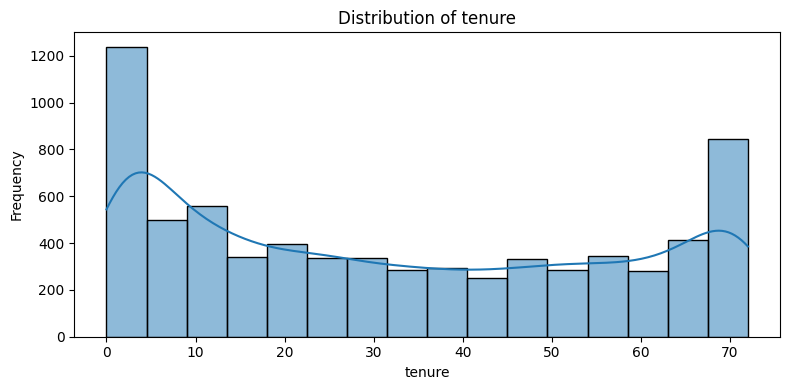

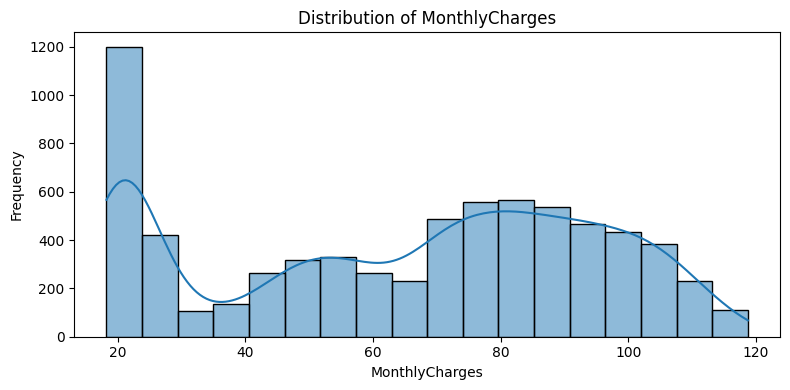

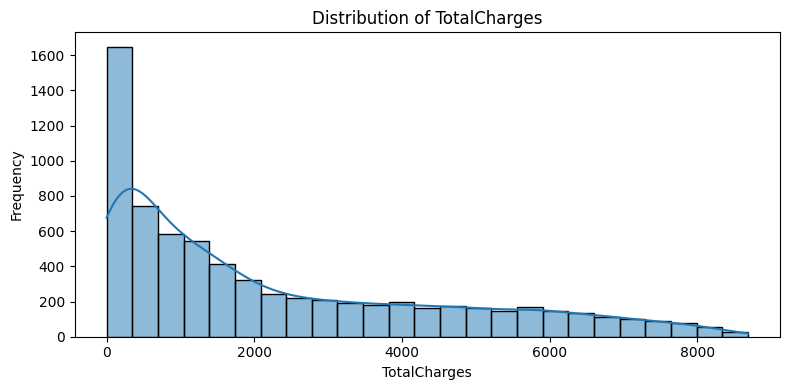


=== Correlation Heatmap ===


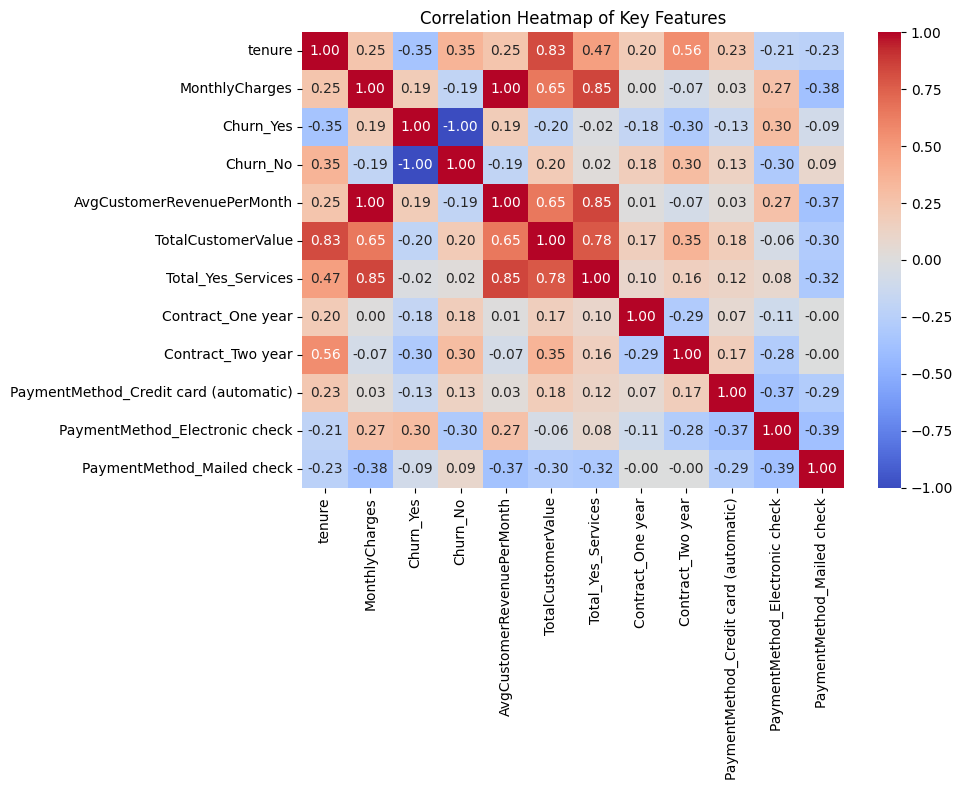

=== Basic Dataset Overview ===
Dataset Shape: (7043, 49)

Data Types:
customerID                                  object
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                                object
gender_Female                              float64
gender_Male                                float64
SeniorCitizen_0                            float64
SeniorCitizen_1                            float64
Partner_No                                 float64
Partner_Yes                                float64
Dependents_No                              float64
Dependents_Yes                             float64
PhoneService_No                            float64
PhoneService_Yes                           float64
MultipleLines_No                           float64
MultipleLines_No phone service             float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetServ

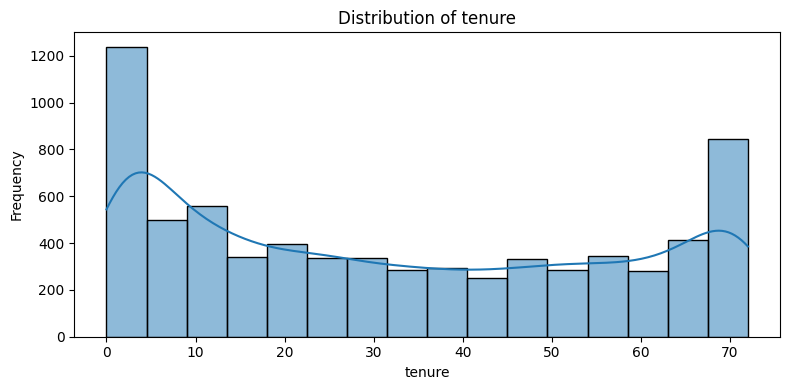

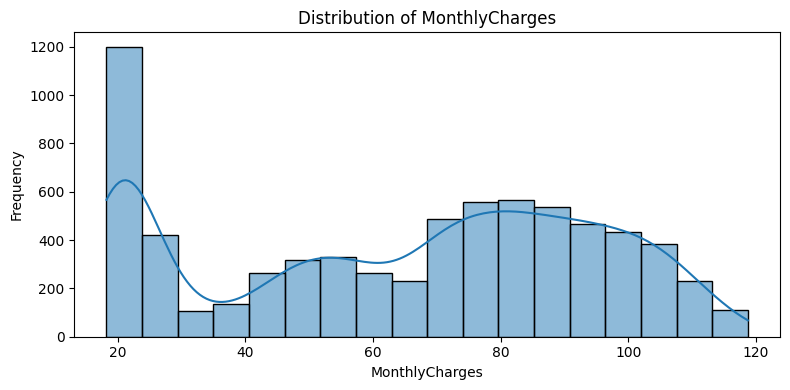

In [10]:
# Function for Data Understanding
def data_understanding(df2):
    """Perform data understanding tasks: inspect data structure, missing values, distributions, and correlations."""
    
    # 1. Basic Dataset Overview
    print("=== Basic Dataset Overview ===")
    print("Dataset Shape:", df2.shape)
    print("\nData Types:")
    print(df2.dtypes)
    print("\nMissing Values per Column:")
    print(df2.isnull().sum())
    
    # 2. Descriptive Statistics for Numerical Features
    print("\n=== Descriptive Statistics For Numerical Features ===")
    print(df2.describe())
    
    # 3. Target Variable Distribution (using the one-hot encoded Churn columns)
    print("\n=== Churn Distribution ===")
    print("Counts:")
    churn_counts = pd.Series({
        "No": df2['Churn_No'].sum(),
        "Yes": df2['Churn_Yes'].sum()
    })
    print(churn_counts)
    print("\nNormalized:")
    print(churn_counts / churn_counts.sum())
    
    # 4. Visualizations
    
    # 4a. Histograms for Numerical Features
    print("\n=== Histograms for Numerical Features ===")
    numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns
    # Limit to a few important numerical columns to avoid too many plots
    important_num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    important_num_cols = [col for col in important_num_cols if col in numerical_cols]
    
    for col in important_num_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df2[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

data_understanding(df2)
print("\n=== Correlation Heatmap ===")
    # Selecting only numerical columns and limit to a reasonable number to avoid an overly cluttered heatmap
corr_cols = ['tenure', 'MonthlyCharges', 'Churn_Yes' , 'Churn_No', 'AvgCustomerRevenuePerMonth', 'TotalCustomerValue', 'Total_Yes_Services','Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
corr_cols = [col for col in corr_cols if col in df2.columns]
    
plt.figure(figsize=(10, 8))
corr_matrix = df2[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Key Features")
plt.tight_layout()
plt.show()

# Example usage:
if __name__ == "__main__":
    df2 = pd.read_csv("C:/Users/Zach/Documents/GitHub/TelecomsPredict/Data/telco_customer_churn_encoded.csv")
    data_understanding(df2)


In [12]:

#replacing the total charge with 0 for empty strings
df2['TotalCharges'] = df2['TotalCharges'].replace(r'^\s*$', '0', regex=True)

# Convert all columns to float
#df = df.astype(float)
#if getting error with customerID can drop
df2 = df2.drop(columns=['customerID'])

# Display the data types
df2 = df2.astype(float)

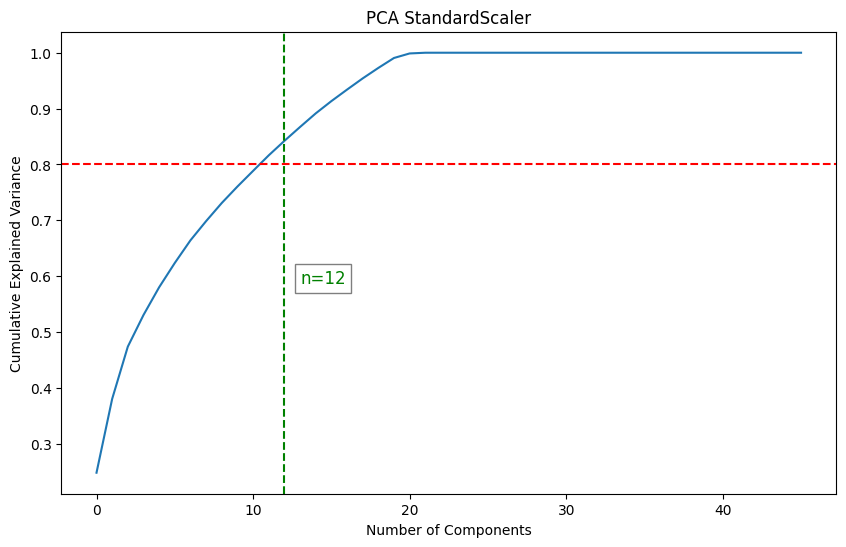

array([2.48292786e-01, 1.32118807e-01, 9.35196116e-02, 5.65948753e-02,
       4.96734626e-02, 4.35192631e-02, 4.04990012e-02, 3.43723004e-02,
       3.24469319e-02, 2.94350974e-02, 2.80138979e-02, 2.78413212e-02,
       2.58815176e-02, 2.48544636e-02, 2.43229963e-02, 2.19648365e-02,
       2.05834805e-02, 2.00857128e-02, 1.87635127e-02, 1.77955046e-02,
       8.12326589e-03, 1.27645440e-03, 2.08994248e-05, 1.31642005e-33,
       1.31642005e-33, 1.31642005e-33, 1.31642005e-33, 1.31642005e-33,
       1.31642005e-33, 1.31642005e-33, 1.31642005e-33, 1.31642005e-33,
       1.31642005e-33, 1.31642005e-33, 1.31642005e-33, 1.31642005e-33,
       1.31642005e-33, 1.31642005e-33, 1.31642005e-33, 1.31642005e-33,
       1.31642005e-33, 1.31642005e-33, 1.31642005e-33, 1.31642005e-33,
       1.31642005e-33, 1.31642005e-33])

In [13]:

## Code as of 4/14/25
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df2.drop(columns=['Churn_Yes', 'Churn_No'])
y = df2['Churn_Yes']

# initializing both of the scalers
StandScaler = StandardScaler()
MinMaxScale = MinMaxScaler()
X_Standscaled = StandScaler.fit_transform(X)
X_MinMaxScaled = MinMaxScale.fit_transform(X)

#Applying PCA for StandardScaler and visualizing the amount of components needed to explain 80% of the variance
pca = PCA(svd_solver='randomized').fit(X_Standscaled)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.8, color='r', linestyle='--')
n_components_ = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.8)[0][0] + 1
plt.axvline(x=n_components_, color='g', linestyle='--')
plt.text(n_components_+1, 0.6, f'n={n_components_}', color='g', fontsize=12, ha='left', va='center_baseline',
         bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA StandardScaler')
plt.show()

pca.explained_variance_ratio_





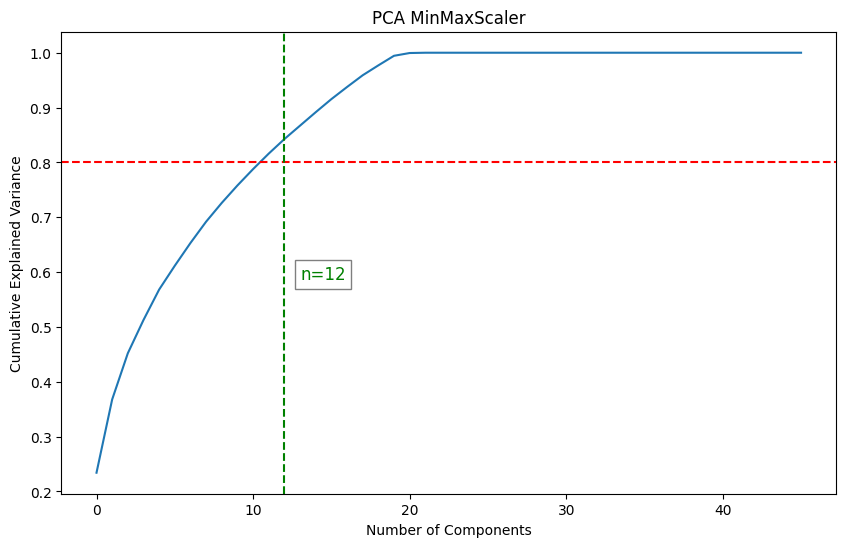

array([2.34045172e-01, 1.33601595e-01, 8.42470118e-02, 6.06249539e-02,
       5.55290957e-02, 4.34722254e-02, 4.14753192e-02, 3.88697864e-02,
       3.42599269e-02, 3.17806784e-02, 2.98133580e-02, 2.83023671e-02,
       2.65130414e-02, 2.44958331e-02, 2.44691636e-02, 2.38644343e-02,
       2.20817250e-02, 2.14124423e-02, 1.80568063e-02, 1.74823806e-02,
       5.05616911e-03, 5.35980385e-04, 1.05339128e-05, 5.73468077e-17,
       3.07947845e-17, 2.86591206e-17, 2.32871592e-17, 1.81820299e-17,
       1.56619047e-17, 1.19731822e-17, 7.81379833e-18, 7.41566704e-18,
       3.52857578e-18, 9.88892681e-20, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [14]:
#same thing for minmaxscaler
pca = PCA().fit(X_MinMaxScaled)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.8, color='r', linestyle='--')
n_components_ = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.8)[0][0] + 1
plt.axvline(x=n_components_, color='g', linestyle='--')
plt.text(n_components_+1, 0.6, f'n={n_components_}', color='g', fontsize=12, ha='left', va='center_baseline',
         bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA MinMaxScaler')
plt.show()

pca.explained_variance_ratio_

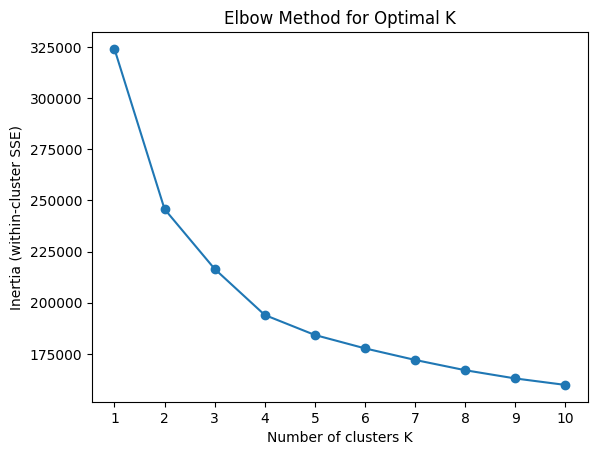

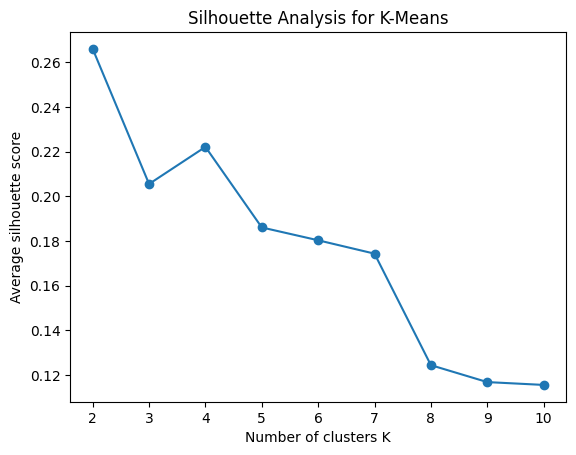

In [15]:
#doing elbow test for KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertias = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(
        n_clusters=k,
        init='k-means++',      # smart centroid init
        n_init=20,             # number of random restarts
        max_iter=400,
        random_state=32
    )
    km.fit(X_Standscaled)
    inertias.append(km.inertia_)

# 3. Plot the “elbow”
plt.figure()
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia (within-cluster SSE)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.show()


#silhouette plot -- Higher the better meaning the clusters are well separated
sil_scores = []
K_range = range(2, 11)   
for k in K_range:
    km = KMeans(n_clusters=k, n_init=20, random_state=32)
    labels = km.fit_predict(X_Standscaled)
    sil = silhouette_score(X_Standscaled, labels)
    sil_scores.append(sil)

plt.figure()
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Average silhouette score')
plt.title('Silhouette Analysis for K-Means')
plt.xticks(K_range)
plt.show()

Cluster centers (original feature units):
      tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0  31.737537       42.028592   1496.033651       0.485337     0.514663   
1  16.473185       74.354670   1261.333181       0.496169     0.503831   
2  54.716810       91.442264   5046.525597       0.501433     0.498567   
3  30.547182       21.079194    662.604784       0.489515     0.510485   

   SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  Dependents_No  \
0         0.847507         0.152493    0.543988     0.456012       0.697947   
1         0.776359         0.223641    0.693543     0.306457       0.838745   
2         0.821872         0.178128    0.277459     0.722541       0.608883   
3         0.965924         0.034076    0.516383     0.483617       0.578637   

   ...  StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0  ...         4.369501e-01                 0.551320           0.212610   
1  ...         3.268880e-01              

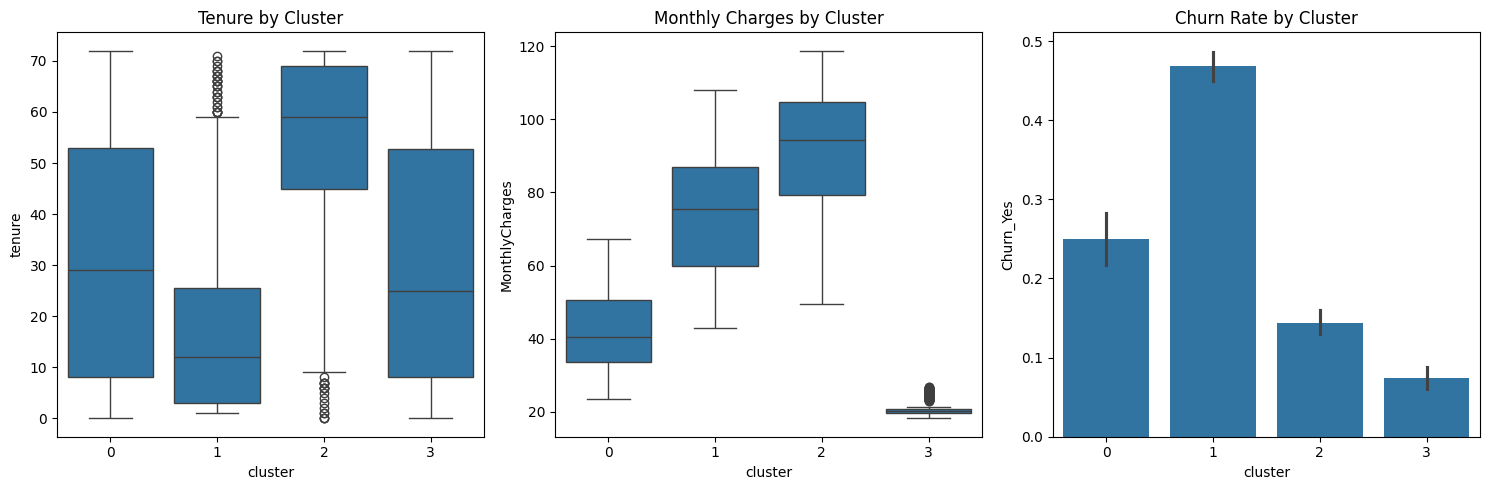

Cluster 1 Feature Means:
tenure                                       16.456736
MonthlyCharges                               74.357886
TotalCharges                               1260.642096
gender_Female                                 0.496166
gender_Male                                   0.503834
SeniorCitizen_0                               0.776196
SeniorCitizen_1                               0.223804
Partner_No                                    0.694049
Partner_Yes                                   0.305951
Dependents_No                                 0.838992
Dependents_Yes                                0.161008
PhoneService_No                               0.000000
PhoneService_Yes                              1.000000
MultipleLines_No                              0.587441
MultipleLines_No phone service                0.000000
MultipleLines_Yes                             0.412559
InternetService_DSL                           0.334064
InternetService_Fiber optic             

In [16]:
# Create clusters using KMeans
df_clusters = df2.copy()
best_km = KMeans(n_clusters=4, n_init=20, random_state=32)
df_clusters['cluster'] = best_km.fit_predict(X_Standscaled)

# Look at cluster centers (inverse-transformed to original scale)
centers = pd.DataFrame(
    StandScaler.inverse_transform(best_km.cluster_centers_),
    columns=X.columns
)
print("Cluster centers (original feature units):")
print(centers)

# Compute feature means per cluster
cluster_summary = df_clusters.groupby('cluster').mean()
print("\nMean feature values by cluster:")
print(cluster_summary)

# Count of points per cluster
print("\nCluster sizes:")
print(df_clusters['cluster'].value_counts())

# Save clustered data
df_clusters.to_csv("C:/Users/Zach/Documents/GitHub/TelecomsPredict/Data/telco_customer_churn_clusters.csv", index=False)

# Visualize key features across clusters
plt.figure(figsize=(15, 5))

# Plot 1: Tenure distribution across clusters
plt.subplot(131)
sns.boxplot(data=df_clusters, x='cluster', y='tenure')
plt.title('Tenure by Cluster')

# Plot 2: Monthly Charges distribution across clusters
plt.subplot(132)
sns.boxplot(data=df_clusters, x='cluster', y='MonthlyCharges')
plt.title('Monthly Charges by Cluster')

# Plot 3: Churn Rate by Cluster
plt.subplot(133)
sns.barplot(data=df_clusters, x='cluster', y='Churn_Yes')
plt.title('Churn Rate by Cluster')

plt.tight_layout()
plt.show()

#we can see that cluster 1 has the highest churn rate lets look at the features of this cluster
print("Cluster 1 Feature Means:")
print(cluster_summary.loc[1])






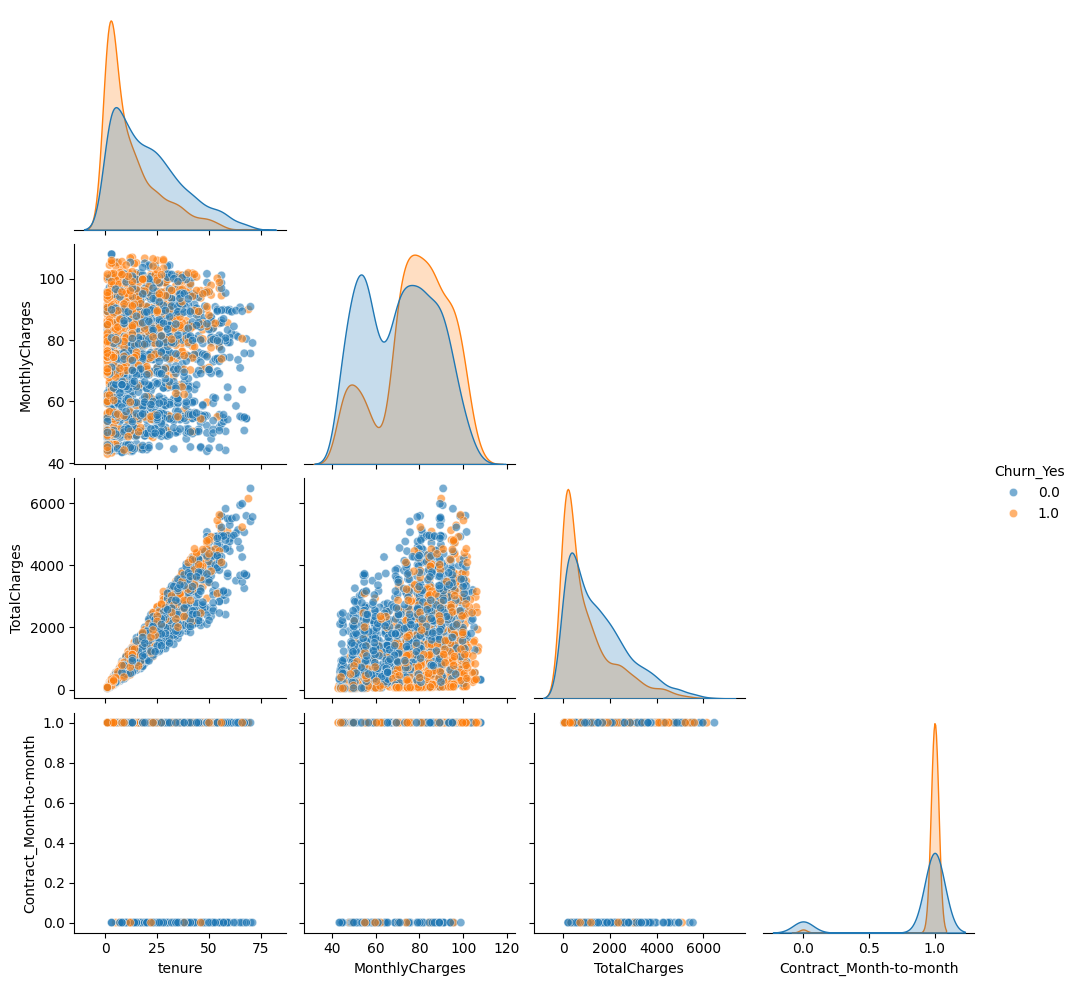

In [17]:
#looking at cluster 1 we can see that is has the highest churn rate -- lets investigate the features of this cluster
#isolate cluster 1
df_c1 = df_clusters[df_clusters['cluster'] == 1]

# list of numeric features (drop the clustering & target columns)
important_feats = ['tenure', 'MonthlyCharges', 'TotalCharges','Contract_Month-to-month']

# 2. Subset your Cluster 1 DataFrame
df_c1_sub = df_c1[important_feats + ['Churn_Yes']]

# 3. Pairplot
sns.pairplot(
    df_c1_sub,
    hue='Churn_Yes',
    corner=True,
    plot_kws={'alpha': 0.6}
)


#looking at the pairplot Churned customers are heavily concentrated at low tenures (peaks < 20 months), while non‑churners span the full range up to ~80 months.
#Month‑to‑month customers are by far the most at‑risk group
#





c:\Users\Zach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


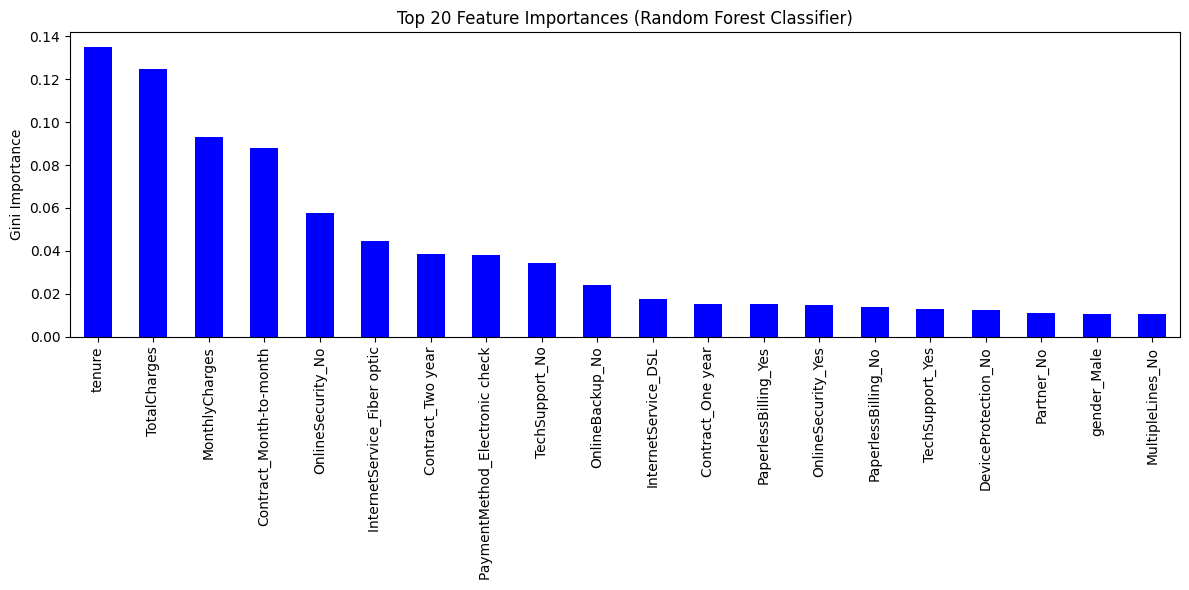

Top 20 most important features:
tenure                            0.135037
TotalCharges                      0.124852
MonthlyCharges                    0.092824
Contract_Month-to-month           0.088011
OnlineSecurity_No                 0.057763
InternetService_Fiber optic       0.044764
Contract_Two year                 0.038601
PaymentMethod_Electronic check    0.037941
TechSupport_No                    0.034509
OnlineBackup_No                   0.024060
InternetService_DSL               0.017446
Contract_One year                 0.015336
PaperlessBilling_Yes              0.015091
OnlineSecurity_Yes                0.014934
PaperlessBilling_No               0.014011
TechSupport_Yes                   0.012715
DeviceProtection_No               0.012504
Partner_No                        0.010892
gender_Male                       0.010829
MultipleLines_No                  0.010549
dtype: float64


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

y = df2[['Churn_Yes']]
X = df2.drop(columns=['Churn_Yes', 'Churn_No'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
X_train_scaled = StandScaler.fit_transform(X_train)
X_test_scaled = StandScaler.transform(X_test)



forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
forest.fit(X_train_scaled, y_train)

# Check and plot feature importances:
importances = pd.Series(forest.feature_importances_, index=X.columns)
top_20 = importances.sort_values(ascending=False).head(20)
top_20.plot(kind='bar', figsize=(12,6), color='Blue')
plt.title("Top 20 Feature Importances (Random Forest Classifier)")
plt.ylabel("Gini Importance")
plt.tight_layout()
plt.show()

print("Top 20 most important features:")
print(top_20)






c:\Users\Zach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


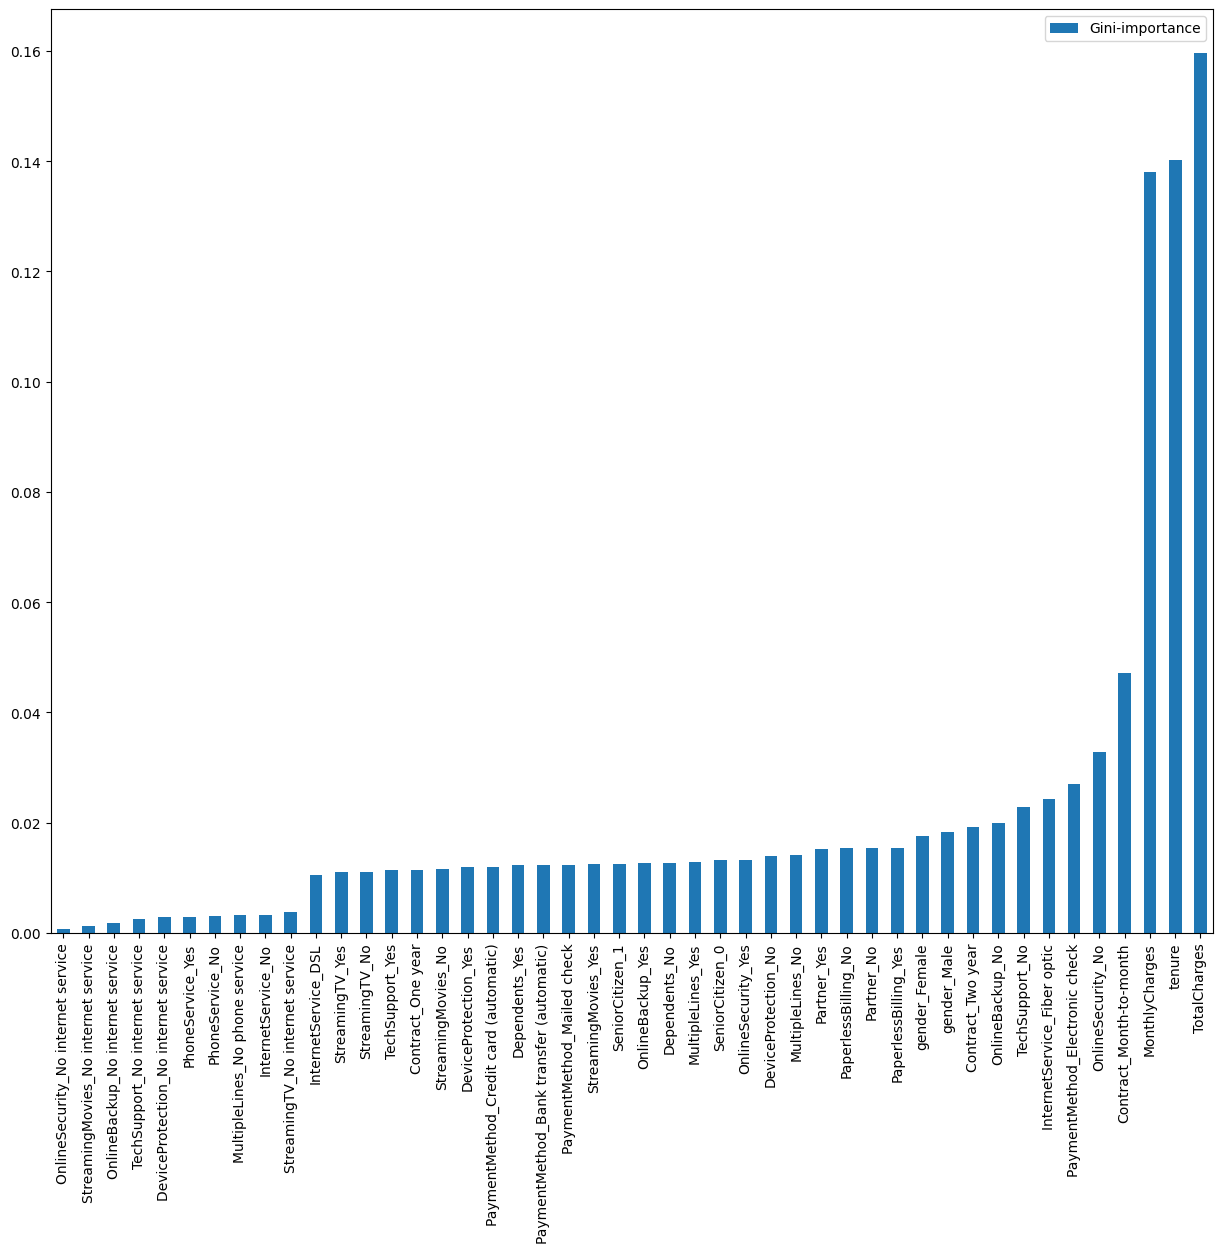

In [19]:
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
feats = {} 
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance  

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

In [20]:
#running classification models based on PCA components
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score            
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from xgboost import XGBClassifier

TrainDF = pd.read_csv('C:/Users/Zach/Documents/GitHub/TelecomsPredict/Data/telco_customer_churn_encoded.csv')
StandScaler = StandardScaler()
MinMaxScale = MinMaxScaler()
#setting the dfs
y = TrainDF[['Churn_Yes']]
#decided to drop avgcustomerrev per month becuase it was not good predictor and had naans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Scaling the data
X_train_scaled = StandScaler.fit_transform(X_train)
X_test_scaled = StandScaler.transform(X_test)
n_components = 12
pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_components, svd_solver='randomized', random_state=42)),
        ('clf', LogisticRegression(random_state=42,solver='liblinear', max_iter=10000))
    ]),
    'Support Vector Machine': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_components, svd_solver='randomized', random_state=42)),
        ('clf', SVC(probability=True, random_state=42, kernel='poly'))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_components, svd_solver='randomized', random_state=42)),
        ('clf', RandomForestClassifier(random_state=42))
    ]),
    'XgBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_components, svd_solver='randomized', random_state=42)),
        ('clf', XGBClassifier(random_state=42))
    ]),
    'SGDClassifier': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_components, svd_solver='randomized', random_state=42)),
        ('clf', SGDClassifier(random_state=42))
    ])
}

# Running each model on the hold-out test set and calculating various metrics
print("\nPerformance:")
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    #classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # performance results
    print(f"\n{name} Model Performance:")
    print(f"  Accuracy:  {accuracy:.3f}")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall:    {recall:.3f}")
    print(f"  F1 Score:  {f1:.3f}")
    


Performance:

Logistic Regression Model Performance:
  Accuracy:  0.779
  Precision: 0.662
  Recall:    0.499
  F1 Score:  0.569


c:\Users\Zach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Zach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Support Vector Machine Model Performance:
  Accuracy:  0.779
  Precision: 0.720
  Recall:    0.404
  F1 Score:  0.518


c:\Users\Zach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Model Performance:
  Accuracy:  0.750
  Precision: 0.601
  Recall:    0.438
  F1 Score:  0.507

XgBoost Model Performance:
  Accuracy:  0.747
  Precision: 0.584
  Recall:    0.482
  F1 Score:  0.528

SGDClassifier Model Performance:
  Accuracy:  0.775
  Precision: 0.614
  Recall:    0.627
  F1 Score:  0.620


c:\Users\Zach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
